In [1]:
import pandas as pd

In [257]:
cities = pd.read_json("data/italy_cities.json")
geo = pd.read_json("data/italy_geo.json")
provinces = pd.read_json("data/italy_provincies.json")

In [258]:
cities_geo = cities.join(geo, lsuffix="_city").drop(["istat_city", "comune_city", "prefisso", "cod_fisco", "superficie"], axis=1)

In [259]:
cities_geo

,regione,provincia,num_residenti,istat,comune,lng,lat
0,Piemonte,TO,2669.0,1001,Agliè,7.7686,45.363433
1,Piemonte,TO,3842.0,1002,Airasca,7.48443104,44.916886
2,Piemonte,TO,469.0,1003,Ala di Stura,7.30434392,45.315110
3,Piemonte,TO,1800.0,1004,Albiano d'Ivrea,7.94914491,45.433893
4,Piemonte,TO,712.0,1005,Alice Superiore,7.77701858,45.460094
...,...,...,...,...,...,...,...
7975,Sardegna,SU,3439.0,111105,Villasimius,9.52036544,39.142384
7976,Sardegna,SU,6875.0,111106,Villasor,8.94065031,39.380689
7977,Sardegna,SU,2437.0,111107,Villaspeciosa,8.92693384,39.312805
7978,,,59620754.0,Total,,,7978.000000


In [260]:
cities_geo.loc[3802,"regione"]  = "Emilia-Romagna"

cities_geo.drop([7978,7979], axis=0, inplace=True)

In [261]:
cities_geo

,regione,provincia,num_residenti,istat,comune,lng,lat
0,Piemonte,TO,2669.0,1001,Agliè,7.7686,45.363433
1,Piemonte,TO,3842.0,1002,Airasca,7.48443104,44.916886
2,Piemonte,TO,469.0,1003,Ala di Stura,7.30434392,45.315110
3,Piemonte,TO,1800.0,1004,Albiano d'Ivrea,7.94914491,45.433893
4,Piemonte,TO,712.0,1005,Alice Superiore,7.77701858,45.460094
...,...,...,...,...,...,...,...
7973,Sardegna,SU,4811.0,111103,Villaputzu,9.57483207,39.440086
7974,Sardegna,SU,1107.0,111104,Villasalto,9.38877379,39.493758
7975,Sardegna,SU,3439.0,111105,Villasimius,9.52036544,39.142384
7976,Sardegna,SU,6875.0,111106,Villasor,8.94065031,39.380689


In [262]:
x = cities_geo[['lat', 'lng']].values.tolist()

coords = []
for lat, lng in x:
    coords.append(f"({lat}, {float(lng)})")

cities_geo["coords"] = coords
cities_geo.drop(["lng","lat"], axis=1, inplace=True)
cities_geo

,regione,provincia,num_residenti,istat,comune,coords
0,Piemonte,TO,2669.0,1001,Agliè,"(45.36343304, 7.7686)"
1,Piemonte,TO,3842.0,1002,Airasca,"(44.91688598, 7.48443104)"
2,Piemonte,TO,469.0,1003,Ala di Stura,"(45.31511014, 7.30434392)"
3,Piemonte,TO,1800.0,1004,Albiano d'Ivrea,"(45.43389336, 7.94914491)"
4,Piemonte,TO,712.0,1005,Alice Superiore,"(45.4600936, 7.77701858)"
...,...,...,...,...,...,...
7973,Sardegna,SU,4811.0,111103,Villaputzu,"(39.44008566, 9.57483207)"
7974,Sardegna,SU,1107.0,111104,Villasalto,"(39.49375831, 9.38877379)"
7975,Sardegna,SU,3439.0,111105,Villasimius,"(39.14238405, 9.52036544)"
7976,Sardegna,SU,6875.0,111106,Villasor,"(39.38068871, 8.94065031)"


In [263]:
provinces.rename(columns = {"sigla":"provincia","provincia":"nome"}, inplace=True)

In [264]:
columns_to_del = ["superficie", "residenti", "num_comuni", "id_regione"]
provinces.drop(columns_to_del, axis=1, inplace=True)
provinces.drop([107,108], axis=0, inplace=True)
provinces

,provincia,nome
0,AG,Agrigento
1,AL,Alessandria
2,AN,Ancona
3,AO,Aosta
4,AP,Ascoli Piceno
...,...,...
102,VE,Venezia
103,VI,Vicenza
104,VR,Verona
105,VT,Viterbo


In [2]:
import psycopg2

In [265]:
provinces = provinces.to_numpy().tolist()

In [182]:
try:
    conn = psycopg2.connect(
        host=HOST,
        database=DB,
        user=USER,
        password=PSWD)
    
    cur = conn.cursor()
    
    sql = "INSERT INTO provinces(province, name) VALUES(%s, %s)"
    cur.executemany(sql,provinces)
    # commit the changes to the database
    conn.commit()
    # close communication with the database
    cur.close()
except (Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

In [269]:
try:
    conn = conn = psycopg2.connect(
        host=HOST,
        database=DB,
        user=USER,
        password=PSWD)
    
    cur = conn.cursor()
    sql = "INSERT INTO municipalities(region, province, population, istat, municipality, coords) VALUES"#(%s, %s, %s, %s, %s, %s::point)"
    args_str = ','.join(cur.mogrify("(%s,%s,%s,%s,%s,%s::point)", x).decode("utf-8") for x in cities_geo.values.tolist())
    # for city in cities_geo.values.tolist():
    cur.execute(sql+args_str)# city)
    # commit the changes to the database
    conn.commit()
    # close communication with the database
    cur.close()
except (Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

In [3]:
import numpy as np

In [ ]:
np.random.random_sample

In [4]:
np.random.seed = 42

In [14]:
b = 0.88
a = 0.33
tmp_x = []
tmp_y = []
for i in range(100):
    tmp_x.append(i)
    tmp_y.append(round(np.random.random()*(b-a) + a, 2))

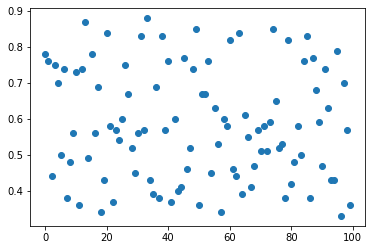

In [15]:
import matplotlib.pyplot as plt
plt.scatter(tmp_x, tmp_y)
plt.show()

In [18]:
try:
    conn = conn = psycopg2.connect(
        host=HOST,
        database=DBNAME,
        user=USER,
        password=PASSWORD)
    
    cur = conn.cursor()
    sql = "SELECT istat FROM municipalities"
    
    cur.execute(sql)
    # commit the changes to the database
    istat = cur.fetchall()
    # close communication with the database
    cur.close()
except (Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

In [39]:
a,b = 0.4, 0.8
tmp = []
for cod in istat:
    tmp.append((round(np.random.random()*(b-a) + a, 2), cod[0]))
tmp

[(0.45, 1001),
 (0.72, 1002),
 (0.59, 1003),
 (0.78, 1004),
 (0.51, 1005),
 (0.76, 1006),
 (0.51, 1007),
 (0.44, 1008),
 (0.51, 1009),
 (0.76, 1010),
 (0.45, 1011),
 (0.77, 1012),
 (0.76, 1013),
 (0.48, 1014),
 (0.53, 1015),
 (0.52, 1016),
 (0.52, 1017),
 (0.79, 1018),
 (0.47, 1019),
 (0.59, 1020),
 (0.4, 1021),
 (0.69, 1022),
 (0.49, 1023),
 (0.8, 1024),
 (0.43, 1025),
 (0.66, 1026),
 (0.67, 1027),
 (0.78, 1028),
 (0.78, 1029),
 (0.73, 1030),
 (0.42, 1031),
 (0.75, 1032),
 (0.47, 1033),
 (0.4, 1034),
 (0.54, 1035),
 (0.58, 1036),
 (0.46, 1037),
 (0.41, 1038),
 (0.59, 1039),
 (0.43, 1040),
 (0.55, 1041),
 (0.53, 1042),
 (0.49, 1043),
 (0.47, 1044),
 (0.6, 1045),
 (0.7, 1046),
 (0.42, 1047),
 (0.68, 1048),
 (0.68, 1049),
 (0.43, 1050),
 (0.56, 1051),
 (0.76, 1052),
 (0.59, 1053),
 (0.68, 1054),
 (0.77, 1055),
 (0.73, 1056),
 (0.75, 1057),
 (0.71, 1058),
 (0.8, 1059),
 (0.47, 1060),
 (0.78, 1061),
 (0.48, 1062),
 (0.8, 1063),
 (0.53, 1064),
 (0.43, 1065),
 (0.68, 1066),
 (0.67, 1067),
 (

In [37]:
tmp[-1000:]

[(0.53, 89018),
 (0.69, 89019),
 (0.65, 89020),
 (0.72, 89021),
 (0.75, 90001),
 (0.58, 90002),
 (0.54, 90003),
 (0.51, 90004),
 (0.63, 90005),
 (0.66, 90006),
 (0.6, 90007),
 (0.65, 90008),
 (0.65, 90009),
 (0.63, 90010),
 (0.56, 90011),
 (0.68, 90012),
 (0.7, 90013),
 (0.74, 90014),
 (0.62, 90015),
 (0.7, 90016),
 (0.52, 90017),
 (0.53, 90018),
 (0.6, 90019),
 (0.66, 90020),
 (0.63, 90021),
 (0.65, 90022),
 (0.6, 90023),
 (0.54, 90024),
 (0.57, 90025),
 (0.68, 90026),
 (0.64, 90027),
 (0.61, 90028),
 (0.69, 90029),
 (0.63, 90030),
 (0.68, 90031),
 (0.55, 90032),
 (0.56, 90033),
 (0.56, 90034),
 (0.54, 90035),
 (0.63, 90036),
 (0.52, 90037),
 (0.58, 90038),
 (0.54, 90039),
 (0.67, 90040),
 (0.7, 90041),
 (0.7, 90042),
 (0.66, 90043),
 (0.6, 90044),
 (0.7, 90045),
 (0.55, 90046),
 (0.63, 90047),
 (0.72, 90048),
 (0.66, 90049),
 (0.73, 90050),
 (0.66, 90051),
 (0.74, 90052),
 (0.64, 90053),
 (0.52, 90054),
 (0.56, 90055),
 (0.63, 90056),
 (0.56, 90057),
 (0.53, 90058),
 (0.67, 90059),
 

In [26]:
from tqdm import tqdm

In [40]:
try:
    conn = conn = psycopg2.connect(
        host=HOST,
        database=DBNAME,
        user=USER,
        password=PASSWORD)
    
    cur = conn.cursor()
    for perc, cod in tqdm(tmp):
        sql = f"UPDATE municipalities SET sporty_pop = {perc} WHERE istat = {cod}"
        cur.execute(sql)
    # commit the changes to the database
    conn.commit()
    # close communication with the database
    cur.close()
except (Exception, psycopg2.DatabaseError) as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

100%|███████████████████████████████████████| 7978/7978 [07:08<00:00, 18.62it/s]
